<a href="https://colab.research.google.com/github/suryamandavilli/SMS_Spam_detection/blob/master/SMS_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> list
Command 'list' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parse

In [3]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [7]:
for mess_no,message in enumerate(messages[:10]):
  print(mess_no, message)
  print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [17]:
import pandas as pd
messages = pd.read_csv('SMSSpamCollection', sep ='\t', names =['label', 'message'])

In [18]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [21]:
# Feature Engineering

In [23]:
messages['length'] = messages['message'].apply(len)

In [24]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
%matplotlib inline

In [27]:
import pandas.util.testing as tm

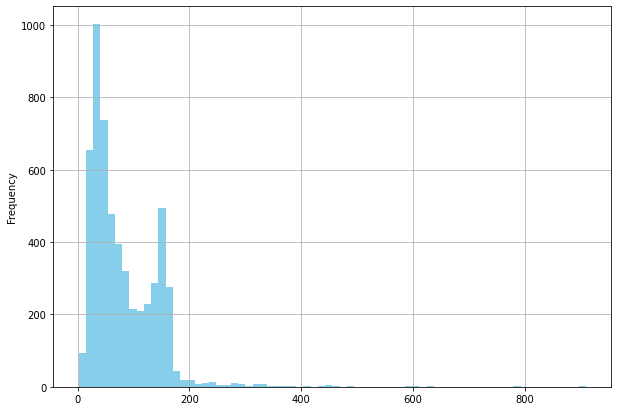

In [51]:
messages['length'].plot.hist(bins = 70, figsize=(10,7), grid=True, color='skyblue')

In [53]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [58]:
messages[messages['length']==910].iloc[0]

label                                                    ham
message    For me the love should start with attraction.i...
length                                                   910
Name: 1085, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d6b127748>,
      dtype=object)

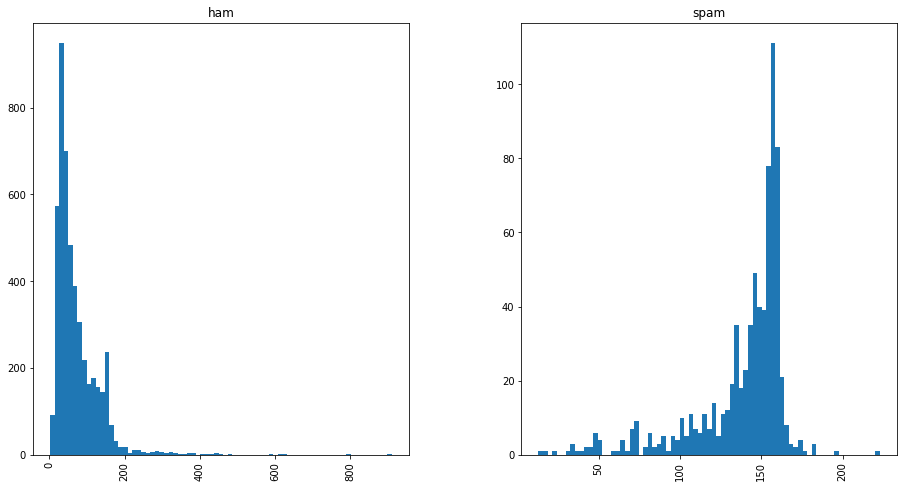

In [65]:
messages.hist(column='length', by='label', bins=75, figsize=(15,8))

In [66]:
#Text Preprocessing

In [68]:
import string

In [69]:
mess = "Sample message! Notice: it has punctuation."

In [72]:
nopunc = [c for c in mess if c not in string.punctuation]

In [76]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [77]:
from nltk.corpus import stopwords

In [101]:
nopunc = "".join(nopunc)

In [110]:
nopunc

'S +   + + +   +   +   + + +   + a +   + + +   +   +   + + +   + m +   + + +   +   +   + + +   + p +   + + +   +   +   + + +   + l +   + + +   +   +   + + +   + e +   + + +   +   +   + + +   +   +   + + +   +   +   + + +   + m +   + + +   +   +   + + +   + e +   + + +   +   +   + + +   + s +   + + +   +   +   + + +   + s +   + + +   +   +   + + +   + a +   + + +   +   +   + + +   + g +   + + +   +   +   + + +   + e +   + + +   +   +   + + +   +   +   + + +   +   +   + + +   + N +   + + +   +   +   + + +   + o +   + + +   +   +   + + +   + t +   + + +   +   +   + + +   + i +   + + +   +   +   + + +   + c +   + + +   +   +   + + +   + e +   + + +   +   +   + + +   +   +   + + +   +   +   + + +   + i +   + + +   +   +   + + +   + t +   + + +   +   +   + + +   +   +   + + +   +   +   + + +   + h +   + + +   +   +   + + +   + a +   + + +   +   +   + + +   + s +   + + +   +   +   + + +   +   +   + + +   +   +   + + +   + p +   + + +   +   +   + + +   + u +   + + +   +   +   + + +   + n +   +

In [111]:
# Now that nopunc has got unncessary characters during these tests, we can remove them.

In [112]:
bad_chars = ['+', '+++', '++', ' + ']

In [113]:
for i in bad_chars:
  nopunc = nopunc.replace(i,'')

In [114]:
nopunc

'S                     a                     m                     p                     l                     e                                           m                     e                     s                     s                     a                     g                     e                                           N                     o                     t                     i                     c                     e                                           i                     t                                           h                     a                     s                                           p                     u                     n                     c                     t                     u                     a                     t                     i                     o                     n'

In [118]:
# Now removing the spaces

In [128]:
nopunc = nopunc.replace('', '')
print(nopunc.translate({ord(i): None for i in ' '}))

SamplemessageNoticeithaspunctuation


In [129]:
nopunc.split()

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 'i',
 't',
 'h',
 'a',
 's',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [131]:
nopunc = ['Sample', 'message', 'Notice', 'punctuation'] # Tokenization manually done

In [133]:
def text_process(mess):
  nopunc = [char for char in mess if char not in string.punctuation] #removed punctuation
  nopunc  = ''.join(nopunc)                                          #removed stopwords     
  return [word for word in nopunc.split() if word.lower not in stopwords.words('english')] #returning list of clean words

In [134]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [138]:
#Tokenization code

In [137]:
messages['message'].head(5).apply(text_process)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, dont, think, he, goes, to, usf, he, l...
Name: message, dtype: object

In [141]:
# Stemming collects the different verb forms of same word and returns just one word from them.
# For example if we have running, ran, run it collects them and just puts run in the list.

# We are not using stemming here since it is not very helpful in an sms dataset. It would be helpful for something like 
# Twitter Sentiment Analysis etc.

# We shall continue with Count Vectorization which is the most important in knowing the similarity of the message.

In [142]:
from sklearn.feature_extraction.text import CountVectorizer

In [143]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [144]:
print(len(bow_transformer.vocabulary_))

11747


In [145]:
mess2 = messages['message'][3]

In [147]:
print(mess2)

U dun say so early hor... U c already then say...


In [150]:
bow2 = bow_transformer.transform([mess2])

In [151]:
print(bow2.shape)

(1, 11747)


In [152]:
print(bow2)

  (0, 4221)	2
  (0, 4828)	1
  (0, 5476)	1
  (0, 6427)	1
  (0, 6447)	1
  (0, 7427)	1
  (0, 9832)	2
  (0, 10174)	1
  (0, 10703)	1


In [155]:
bow_transformer.get_feature_names()[9832]

'say'

In [157]:
messages_bow = bow_transformer.transform(messages['message'])

In [158]:
print('Shape of the Sparse Matrix: ', messages_bow.shape)

Shape of the Sparse Matrix:  (5572, 11747)


In [159]:
messages_bow.count_nonzero

<bound method _data_matrix.count_nonzero of <5572x11747 sparse matrix of type '<class 'numpy.int64'>'
	with 79463 stored elements in Compressed Sparse Row format>>

In [160]:
messages_bow.nnz

79463

In [161]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

In [163]:
print('Sparsity: {}'.format(sparsity))

Sparsity: 0.12140229049026034


In [164]:
# Term Frequency - Inverse Document Frequency

In [165]:
from sklearn.feature_extraction.text import TfidfTransformer

In [166]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [167]:
tfidf2 = tfidf_transformer.transform(bow2)

In [168]:
print(tfidf2)

  (0, 10703)	0.2214828525636521
  (0, 10174)	0.19345051326676527
  (0, 9832)	0.5147493130794172
  (0, 7427)	0.41952836023632145
  (0, 6447)	0.3046289560740644
  (0, 6427)	0.28629349827015765
  (0, 5476)	0.2841540501592932
  (0, 4828)	0.25442769469153637
  (0, 4221)	0.3902711884065556


In [169]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['University']]

8.93254160700959

In [178]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [171]:
# naive Bayes Classifier

In [186]:
from sklearn.naive_bayes import MultinomialNB

In [187]:
spam_detection_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [183]:
spam_detection_model.predict(tfidf2)

array(['ham'], dtype='<U4')

In [184]:
messages['label'][3]

'ham'

In [189]:
all_pred = spam_detection_model.predict(messages_tfidf)

In [190]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'],messages['label'], 
                                                                test_size=0.3, random_state=101)

In [194]:
msg_train

4028        Yes, princess. Are you going to make me moan?
1310              Ok, be careful ! Don't text and drive !
5469                                              Ok lor.
5375    I cant pick the phone right now. Pls send a me...
3814                Pls i wont belive god.not only jesus.
                              ...                        
4171    Mmmmmm ... I love you,so much, Ahmad ... I can...
599     Will do. Was exhausted on train this morning. ...
1361    Yo dude guess who just got arrested the other day
1547                Shant disturb u anymore... Jia you...
4959                     Why didn't u call on your lunch?
Name: message, Length: 3900, dtype: object

In [195]:
# Direct text-processing using sklearn Pipeline

In [205]:
from sklearn.pipeline import Pipeline

In [207]:
pipeline = Pipeline([
                     ('bow', CountVectorizer(analyzer=text_process)),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', MultinomialNB())
])

In [208]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9d6abdbd90>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [209]:
predictions = pipeline.predict(msg_test)

In [210]:
from sklearn.metrics import classification_report

In [211]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1475
        spam       1.00      0.58      0.73       197

    accuracy                           0.95      1672
   macro avg       0.97      0.79      0.85      1672
weighted avg       0.95      0.95      0.94      1672

